In [25]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [26]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## Nordic Device-25 Own Models

## Nordic Device-25(i) dataset

In [3]:
class_label = 8
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Nordic/Device-25(i)/"

    if(i==0):
        data = getData(folder_path + "BLINK_new.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "blinky_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "blinky_rtc_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "blinky_systick.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "blinky.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "IDLE_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "led_softblink.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "Matrix_MUL_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[ 0.046875 -0.0546875j  0.0703125+0.0078125j -0.015625 -0.078125j  ...
 -0.0390625-0.1640625j -0.078125 -0.0234375j  0.0234375-0.0078125j]
2048
75193
(2048, 75193)
[0.02891908 0.01625739 0.00515618 ... 0.00561692 0.00572858 0.01698964]
0
(10000, 2048)
(10000,)
[ 0.046875 +0.0078125j -0.0859375+0.015625j   0.078125 -0.03125j   ...
  0.09375  -0.015625j  -0.015625 -0.0625j    -0.0234375-0.0859375j]
2048
71536
(2048, 71536)
[0.02900774 0.01949993 0.00782374 ... 0.0054048  0.0065753  0.01679224]
1
(20000, 2048)
(20000,)
[-0.015625 -0.0390625j  0.046875 -0.046875j   0.0078125+0.015625j  ...
  0.       +0.0078125j -0.0078125-0.0546875j -0.0390625-0.03125j  ]
2048
79948
(2048, 79948)
[0.02881636 0.01655435 0.00561349 ... 0.00583372 0.00589733 0.01669759]
2
(30000, 2048)
(30000,)
[ 0.0546875+0.046875j  -0.015625 -0.0078125j  0.0625   -0.015625j  ...
 -0.0234375-0.125j      0.0546875+0.046875j   0.       -0.0546875j]
2048
85725
(2048, 85725)
[0.0291865  0.01664384 0.00656994 ... 0.00673976 0.00

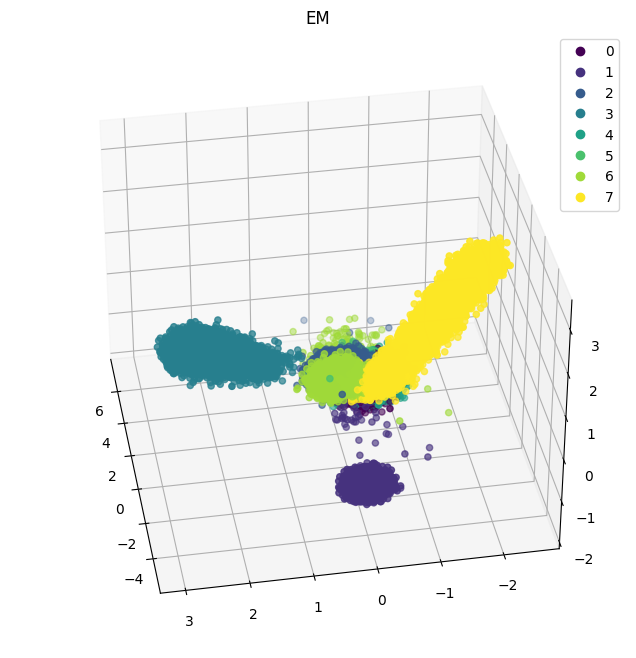

In [5]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-25/Nordic-25(i)_scatter.pdf')

In [6]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 8)                 808       
                                                                 
Total params: 4,511,008
Trainable params: 4,511,008
Non-

2023-03-10 12:39:03.865711: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-25/Nordic-25(i)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2025/2025 [==============================] - 21s 10ms/step - loss: 1.8348 - accuracy: 0.4414 - val_loss: 1.3400 - val_accuracy: 0.9250
Epoch 2/30
2025/2025 [==============================] - 21s 10ms/step - loss: 0.6797 - accuracy: 0.9642 - val_loss: 0.2551 - val_accuracy: 0.9899
Epoch 3/30
2025/2025 [==============================] - 20s 10ms/step - loss: 0.1403 - accuracy: 0.9941 - val_loss: 0.0765 - val_accuracy: 0.9960
Epoch 4/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.0538 - accuracy: 0.9970 - val_loss: 0.0395 - val_accuracy: 0.9964
Epoch 5/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.0308 - accuracy: 0.9978 - val_loss: 0.0266 - val_accuracy: 0.9968
Epoch 6/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.0213 - accuracy: 0.9982 - val_loss: 0.0198 - val_accuracy: 0.9971
Epoch 7/30
2025/2025 [==============================] - 20s 10ms/step - loss: 0.0162 - accuracy: 0.9985 - val_loss: 0.0157 - va

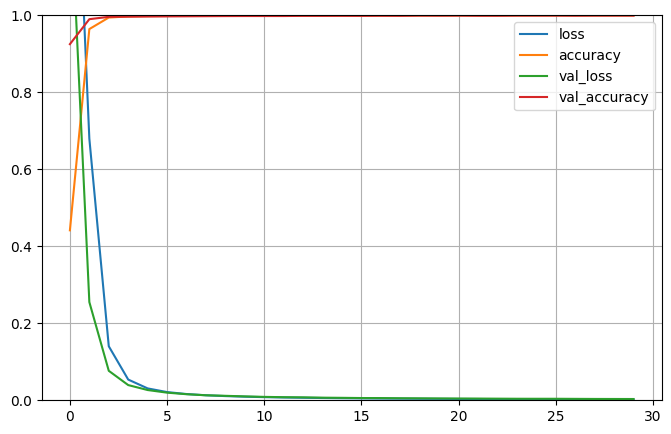

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/accuracy_and_loss_iPhone14Pro_I.pdf')

In [10]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-25/Nordic-25(i)_model.h5")

In [11]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

250/250 [==============================] - 1s 4ms/step - loss: 0.0040 - accuracy: 0.9996
test loss, test acc: [0.003988660406321287, 0.999625027179718]


In [12]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

250/250 [==============================] - 1s 4ms/step
[0 0 3 ... 6 4 6]
0
[[ 927    0    0    0    0    0    0    0]
 [   0  997    2    0    0    0    0    0]
 [   0    0  979    0    0    0    0    0]
 [   0    0    0  976    0    0    0    0]
 [   0    0    0    0 1080    0    0    0]
 [   0    1    0    0    0 1015    0    0]
 [   0    0    0    0    0    0 1015    0]
 [   0    0    0    0    0    0    0 1008]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00       999
           2       1.00      1.00      1.00       979
           3       1.00      1.00      1.00       976
           4       1.00      1.00      1.00      1080
           5       1.00      1.00      1.00      1016
           6       1.00      1.00      1.00      1015
           7       1.00      1.00      1.00      1008

    accuracy                           1.00      8000
   macro avg       1.00      1.00     

Test Accuracy:0.999625


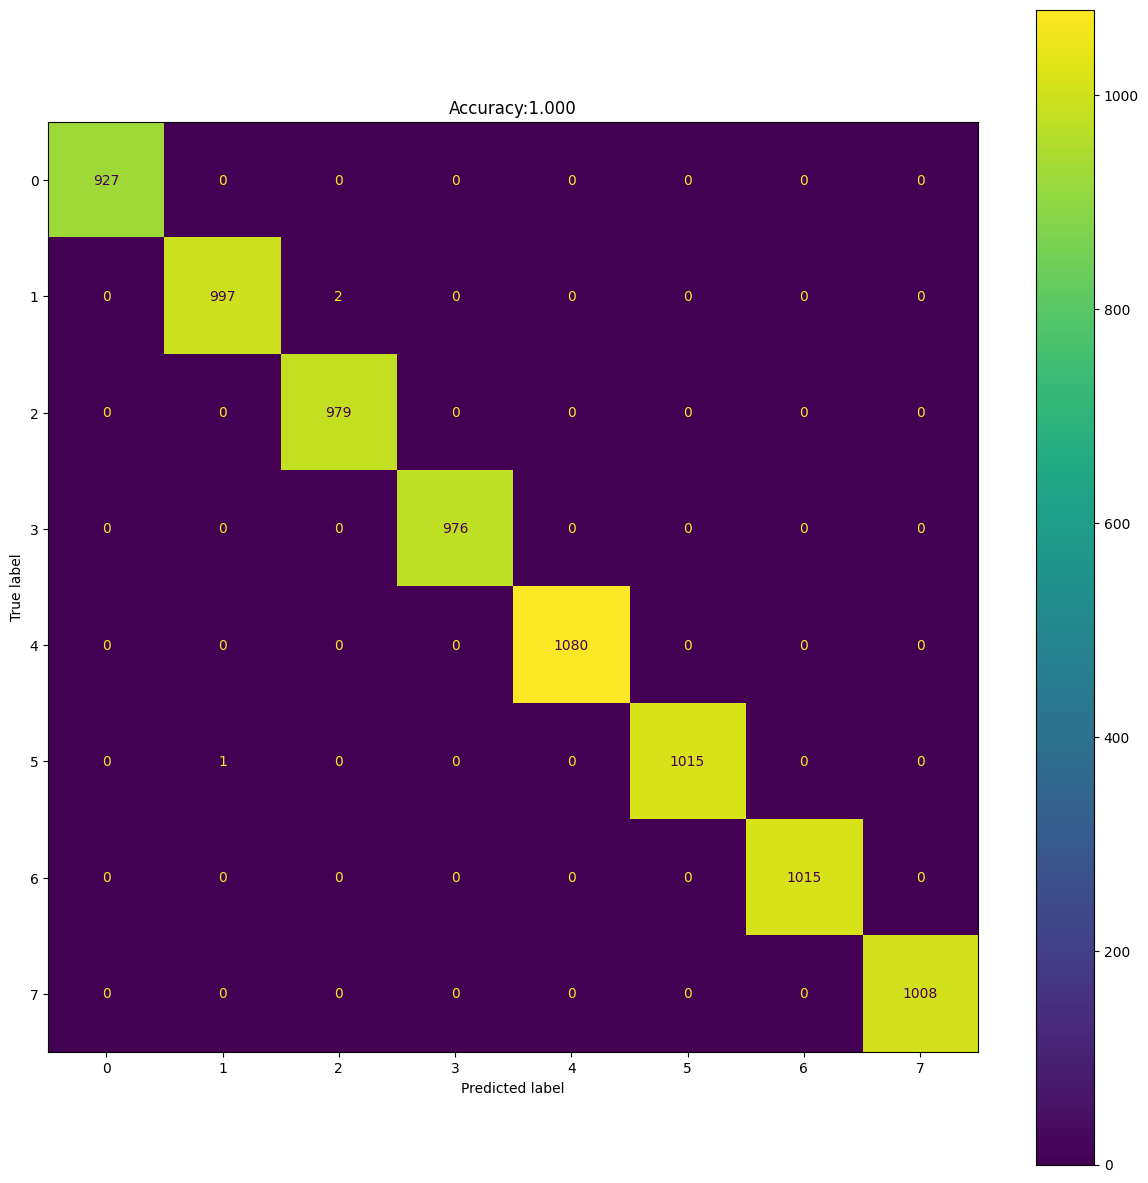

In [13]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-25/iNordic-25(i)_confusion_matrix.pdf')

## Nordic Device-25(ii) dataset

In [14]:
class_label = 8
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Nordic/Device-25(ii)/"

    if(i==0):
        data = getData(folder_path + "BLINK_new.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "blinky_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "blinky_rtc_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "blinky_systick.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "blinky.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "IDLE_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "led_softblink.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "Matrix_MUL_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[ 0.0078125+0.0625j     0.0390625+0.j        -0.0390625+0.0390625j ...
 -0.0078125-0.0234375j  0.1015625+0.0546875j  0.046875 +0.0390625j]
2048
78411
(2048, 78411)
[0.02889216 0.01660975 0.0053785  ... 0.00583319 0.00550056 0.0164561 ]
0
(10000, 2048)
(10000,)
[-0.0234375-0.03125j    0.03125  -0.0390625j  0.0078125+0.03125j   ...
 -0.03125  +0.0625j     0.0234375-0.046875j   0.0625   -0.0390625j]
2048
81337
(2048, 81337)
[0.03141468 0.01768619 0.01048852 ... 0.00739244 0.01048987 0.0188464 ]
1
(20000, 2048)
(20000,)
[-0.0078125-0.0078125j -0.0390625+0.0234375j -0.0078125-0.0546875j ...
  0.0234375-0.03125j    0.0546875+0.015625j  -0.0078125-0.03125j  ]
2048
77535
(2048, 77535)
[0.02909132 0.01692267 0.00512614 ... 0.00613394 0.00625093 0.0165682 ]
2
(30000, 2048)
(30000,)
[ 0.046875 +0.0234375j  0.0234375+0.j         0.0625   +0.j        ...
 -0.046875 +0.0390625j  0.03125  -0.015625j   0.0078125-0.0078125j]
2048
82068
(2048, 82068)
[0.03213584 0.01857948 0.00639128 ... 0.02845637 0.02

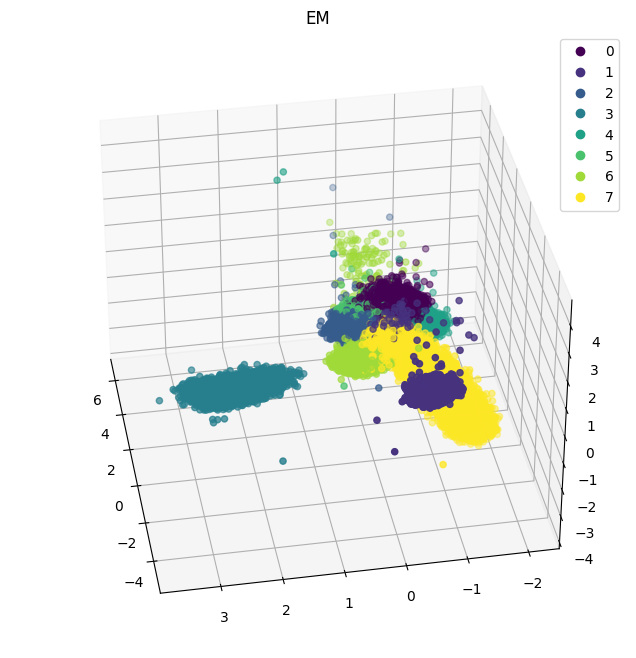

In [15]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-25/Nordic-25(ii)_scatter.pdf')

In [16]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 8)                 808       
                                                                 
Total params: 4,511,008
Trainable params: 4,511,008
No

In [18]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-25/Nordic-25(ii)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2025/2025 [==============================] - 21s 10ms/step - loss: 1.7779 - accuracy: 0.5533 - val_loss: 1.1659 - val_accuracy: 0.8318
Epoch 2/30
2025/2025 [==============================] - 21s 11ms/step - loss: 0.6379 - accuracy: 0.9419 - val_loss: 0.3125 - val_accuracy: 0.9789
Epoch 3/30
2025/2025 [==============================] - 20s 10ms/step - loss: 0.1821 - accuracy: 0.9900 - val_loss: 0.1007 - val_accuracy: 0.9939
Epoch 4/30
2025/2025 [==============================] - 22s 11ms/step - loss: 0.0669 - accuracy: 0.9962 - val_loss: 0.0460 - val_accuracy: 0.9971
Epoch 5/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.0351 - accuracy: 0.9977 - val_loss: 0.0283 - val_accuracy: 0.9983
Epoch 6/30
2025/2025 [==============================] - 22s 11ms/step - loss: 0.0228 - accuracy: 0.9984 - val_loss: 0.0198 - val_accuracy: 0.9986
Epoch 7/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.0166 - accuracy: 0.9987 - val_loss: 0.0145 - v

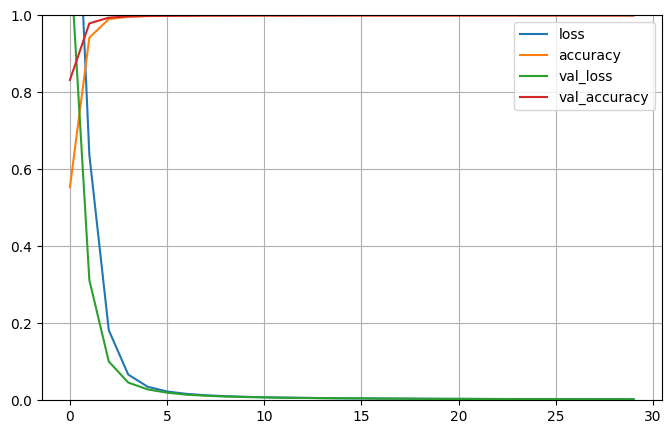

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-25/Nordic-25(ii)_model.h5")

In [23]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

250/250 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.9996
test loss, test acc: [0.002559977350756526, 0.999625027179718]


In [25]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

250/250 [==============================] - 1s 4ms/step
[0 0 3 ... 6 4 6]
0
[[ 927    0    0    0    0    0    0    0]
 [   0  997    0    0    0    1    1    0]
 [   0    0  979    0    0    0    0    0]
 [   0    0    0  976    0    0    0    0]
 [   0    0    0    0 1080    0    0    0]
 [   0    0    1    0    0 1015    0    0]
 [   0    0    0    0    0    0 1015    0]
 [   0    0    0    0    0    0    0 1008]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00       999
           2       1.00      1.00      1.00       979
           3       1.00      1.00      1.00       976
           4       1.00      1.00      1.00      1080
           5       1.00      1.00      1.00      1016
           6       1.00      1.00      1.00      1015
           7       1.00      1.00      1.00      1008

    accuracy                           1.00      8000
   macro avg       1.00      1.00     

Test Accuracy:0.999625


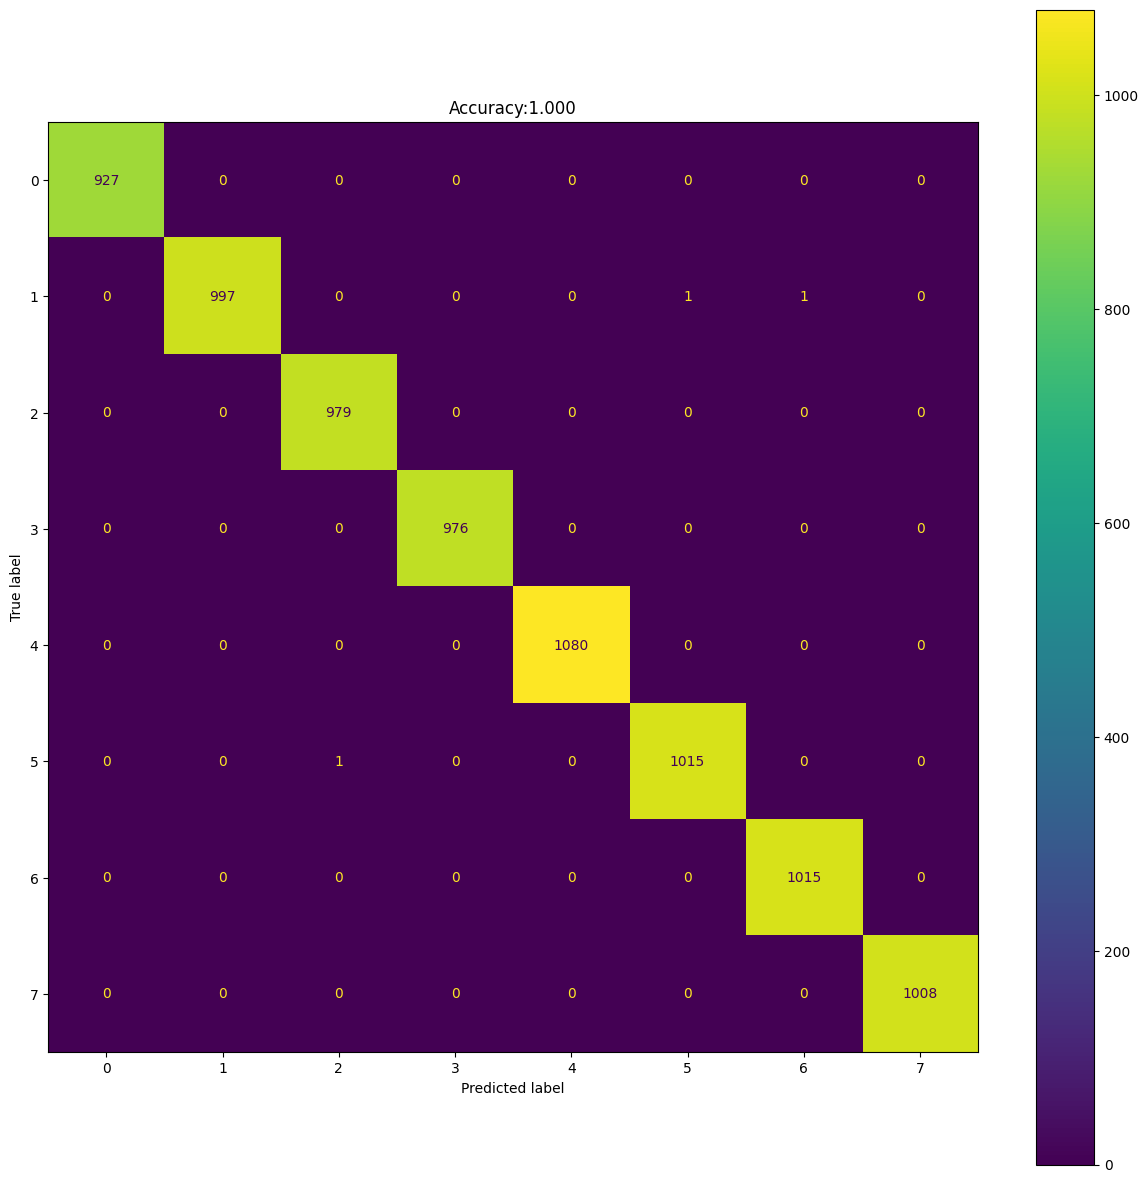

In [26]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/Device-25/iNordic-25(ii)_confusion_matrix.pdf')

## Nordic Device-25(iii) dataset

In [3]:
class_label = 8
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Nordic/32MHz/Device-25(iii)/"

    if(i==0):
        data = getData(folder_path + "BLINK_new.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "blinky_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "blinky_rtc_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "blinky_systick.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "blinky.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "IDLE_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "led_softblink.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "Matrix_MUL_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[ 0.015625 +0.0234375j  0.0390625+0.0234375j  0.015625 +0.0078125j ...
 -0.0703125-0.015625j   0.03125  +0.0625j     0.03125  -0.0390625j]
2048
84336
(2048, 84336)
[0.02507629 0.01529848 0.00455177 ... 0.00481338 0.00519102 0.01487319]
0
(10000, 2048)
(10000,)
[ 0.0234375+0.j         0.0234375-0.015625j   0.0390625+0.0234375j ...
  0.0390625-0.0078125j -0.03125  -0.0234375j  0.0390625+0.03125j  ]
2048
82801
(2048, 82801)
[0.02520441 0.01502084 0.0049348  ... 0.00482676 0.00487362 0.01468235]
1
(20000, 2048)
(20000,)
[-0.015625 -0.015625j   0.046875 -0.1171875j -0.0078125-0.0234375j ...
  0.0234375-0.0234375j  0.       +0.0390625j  0.0390625-0.0546875j]
2048
93261
(2048, 93261)
[0.025306   0.01482049 0.00509501 ... 0.00460829 0.00502229 0.01480712]
2
(30000, 2048)
(30000,)
[-0.0078125-0.1953125j -0.0390625-0.0234375j  0.109375 +0.109375j  ...
  0.015625 -0.1640625j -0.0234375+0.1015625j  0.0546875-0.109375j ]
2048
80564
(2048, 80564)
[0.02515789 0.01462993 0.00543042 ... 0.00497138 0.00

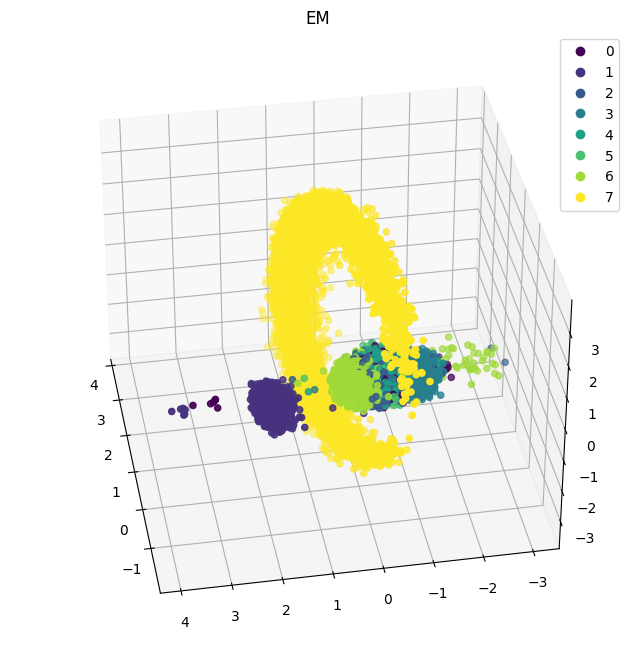

In [4]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-25/Nordic-device-25-Own_models/Nordic-25(iii)_scatter.pdf')

In [5]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 8)                 808       
                                                                 
Total params: 4,511,008
Trainable params: 4,511,008
Non-

2023-04-09 15:20:02.862275: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-25/Nordic-device-25-Own_models/Nordic-25(iii)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2025/2025 [==============================] - 21s 10ms/step - loss: 1.9014 - accuracy: 0.4608 - val_loss: 1.5568 - val_accuracy: 0.7040
Epoch 2/30
2025/2025 [==============================] - 18s 9ms/step - loss: 1.0911 - accuracy: 0.8027 - val_loss: 0.7142 - val_accuracy: 0.8958
Epoch 3/30
2025/2025 [==============================] - 18s 9ms/step - loss: 0.4585 - accuracy: 0.9348 - val_loss: 0.2803 - val_accuracy: 0.9615
Epoch 4/30
2025/2025 [==============================] - 18s 9ms/step - loss: 0.1900 - accuracy: 0.9723 - val_loss: 0.1363 - val_accuracy: 0.9796
Epoch 5/30
2025/2025 [==============================] - 18s 9ms/step - loss: 0.1041 - accuracy: 0.9848 - val_loss: 0.0838 - val_accuracy: 0.9879
Epoch 6/30
2025/2025 [==============================] - 18s 9ms/step - loss: 0.0697 - accuracy: 0.9896 - val_loss: 0.0645 - val_accuracy: 0.9907
Epoch 7/30
2025/2025 [==============================] - 19s 9ms/step - loss: 0.0520 - accuracy: 0.9926 - val_loss: 0.0507 - val_a

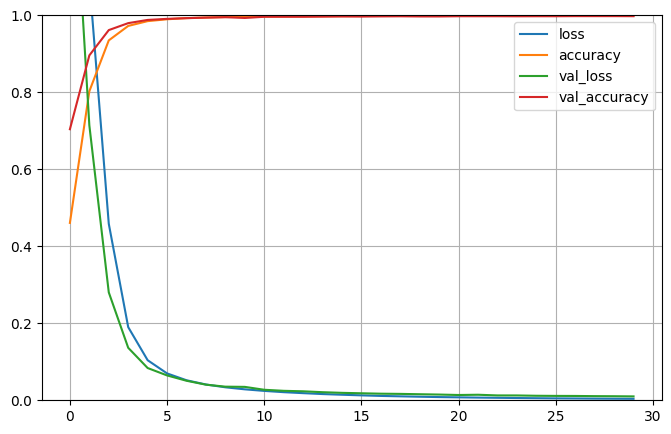

In [8]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/accuracy_and_loss_iPhone14Pro_I.pdf')

In [9]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-25/Nordic-device-25-Own_models/Nordic-25(iii)_model.h5")

In [10]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

250/250 [==============================] - 1s 4ms/step - loss: 0.0071 - accuracy: 0.9979
test loss, test acc: [0.0071485405787825584, 0.9978749752044678]


In [11]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

250/250 [==============================] - 1s 5ms/step
[0 0 3 ... 6 4 6]
0
[[ 925    0    0    0    0    2    0    0]
 [   0  997    0    1    0    1    0    0]
 [   0    0  978    0    0    1    0    0]
 [   0    0    0  973    0    1    2    0]
 [   0    0    0    0 1076    4    0    0]
 [   1    0    0    0    0 1015    0    0]
 [   0    0    0    0    0    3 1012    0]
 [   0    0    0    0    0    1    0 1007]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00       999
           2       1.00      1.00      1.00       979
           3       1.00      1.00      1.00       976
           4       1.00      1.00      1.00      1080
           5       0.99      1.00      0.99      1016
           6       1.00      1.00      1.00      1015
           7       1.00      1.00      1.00      1008

    accuracy                           1.00      8000
   macro avg       1.00      1.00     

Test Accuracy:0.997875


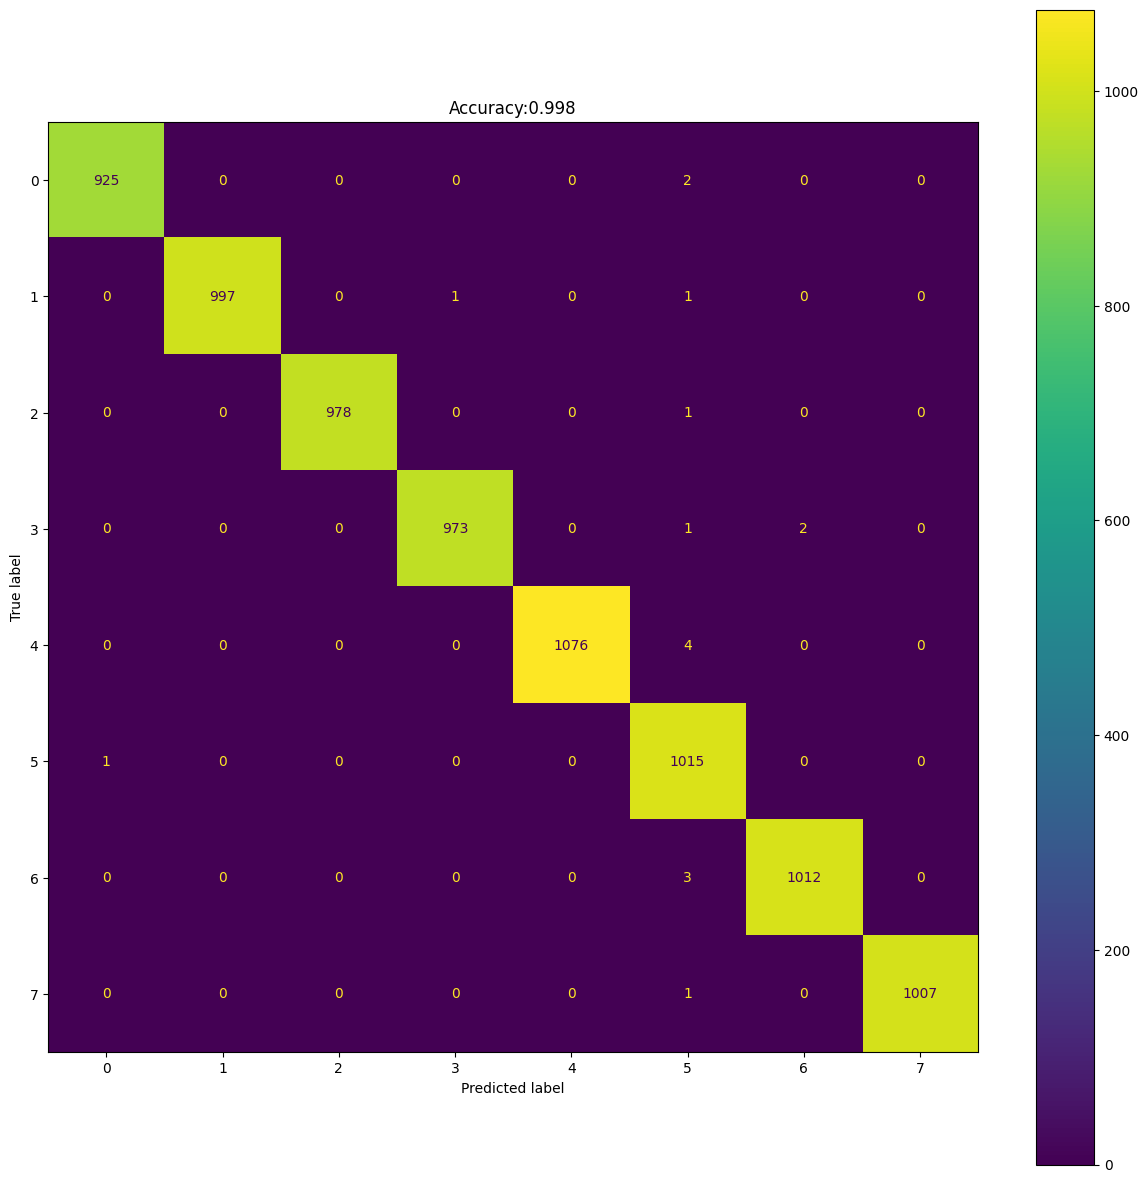

In [12]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-25/Nordic-device-25-Own_models/iNordic-25(iii)_confusion_matrix.pdf')

## Nordic Device-25(iv) dataset

In [15]:
class_label = 8
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Nordic/32MHz/Device-25(iv)/"

    if(i==0):
        data = getData(folder_path + "BLINK_new.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "blinky_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "blinky_rtc_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "blinky_systick.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "blinky.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "IDLE_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "led_softblink.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "Matrix_MUL_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[ 0.0703125+0.0390625j  0.0390625-0.0546875j -0.0078125+0.0546875j ...
 -0.0390625+0.0546875j  0.0390625-0.09375j   -0.078125 -0.0078125j]
2048
95015
(2048, 95015)
[0.02549697 0.01474899 0.00491422 ... 0.00467612 0.00479742 0.01456751]
0
(10000, 2048)
(10000,)
[ 0.109375 +0.j         0.09375  +0.078125j  -0.0234375-0.015625j  ...
  0.0234375-0.0390625j -0.0078125+0.0078125j -0.0078125+0.0234375j]
2048
83385
(2048, 83385)
[0.02562689 0.01466803 0.00470259 ... 0.00465174 0.00503456 0.01461309]
1
(20000, 2048)
(20000,)
[ 0.0390625+0.0078125j -0.0078125-0.015625j   0.0546875-0.015625j  ...
  0.109375 -0.0078125j -0.0390625-0.0234375j  0.046875 -0.0078125j]
2048
86384
(2048, 86384)
[0.02593468 0.01466704 0.00534774 ... 0.0049786  0.00478496 0.01484122]
2
(30000, 2048)
(30000,)
[ 0.0546875-0.03125j    0.109375 -0.0546875j -0.078125 -0.0078125j ...
  0.0390625+0.09375j   -0.078125 -0.203125j   0.       -0.0390625j]
2048
82434
(2048, 82434)
[0.02501773 0.01532712 0.00525362 ... 0.00459394 0.00

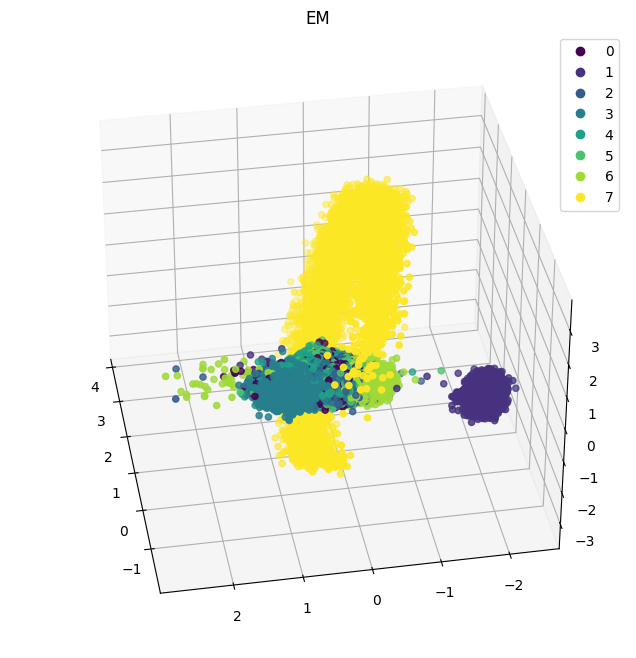

In [16]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-25/Nordic-device-25-Own_models/Nordic-25(iv)_scatter.pdf')

In [17]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 8)                 808       
                                                                 
Total params: 4,511,008
Trainable params: 4,511,008
No

In [19]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-25/Nordic-device-25-Own_models/Nordic-25(iv)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2025/2025 [==============================] - 21s 10ms/step - loss: 1.9045 - accuracy: 0.4271 - val_loss: 1.5689 - val_accuracy: 0.6807
Epoch 2/30
2025/2025 [==============================] - 19s 9ms/step - loss: 1.0766 - accuracy: 0.7941 - val_loss: 0.6912 - val_accuracy: 0.8537
Epoch 3/30
2025/2025 [==============================] - 18s 9ms/step - loss: 0.4659 - accuracy: 0.9201 - val_loss: 0.3176 - val_accuracy: 0.9506
Epoch 4/30
2025/2025 [==============================] - 29s 14ms/step - loss: 0.2289 - accuracy: 0.9631 - val_loss: 0.1722 - val_accuracy: 0.9718
Epoch 5/30
2025/2025 [==============================] - 20s 10ms/step - loss: 0.1257 - accuracy: 0.9816 - val_loss: 0.1018 - val_accuracy: 0.9847
Epoch 6/30
2025/2025 [==============================] - 20s 10ms/step - loss: 0.0783 - accuracy: 0.9890 - val_loss: 0.0702 - val_accuracy: 0.9899
Epoch 7/30
2025/2025 [==============================] - 20s 10ms/step - loss: 0.0555 - accuracy: 0.9923 - val_loss: 0.0572 - v

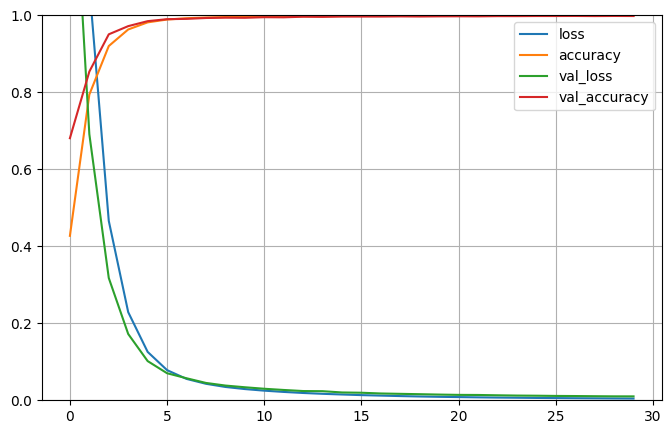

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-25/Nordic-device-25-Own_models/Nordic-25(iv)_model.h5")

In [22]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

250/250 [==============================] - 1s 4ms/step - loss: 0.0060 - accuracy: 0.9991
test loss, test acc: [0.0059988051652908325, 0.9991250038146973]


In [23]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

250/250 [==============================] - 1s 4ms/step
[0 0 3 ... 6 4 6]
0
[[ 925    0    0    0    1    1    0    0]
 [   0  998    1    0    0    0    0    0]
 [   0    0  979    0    0    0    0    0]
 [   0    0    0  976    0    0    0    0]
 [   0    0    0    0 1079    1    0    0]
 [   1    0    1    0    0 1014    0    0]
 [   0    0    0    0    0    1 1014    0]
 [   0    0    0    0    0    0    0 1008]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00       999
           2       1.00      1.00      1.00       979
           3       1.00      1.00      1.00       976
           4       1.00      1.00      1.00      1080
           5       1.00      1.00      1.00      1016
           6       1.00      1.00      1.00      1015
           7       1.00      1.00      1.00      1008

    accuracy                           1.00      8000
   macro avg       1.00      1.00     

Test Accuracy:0.999125


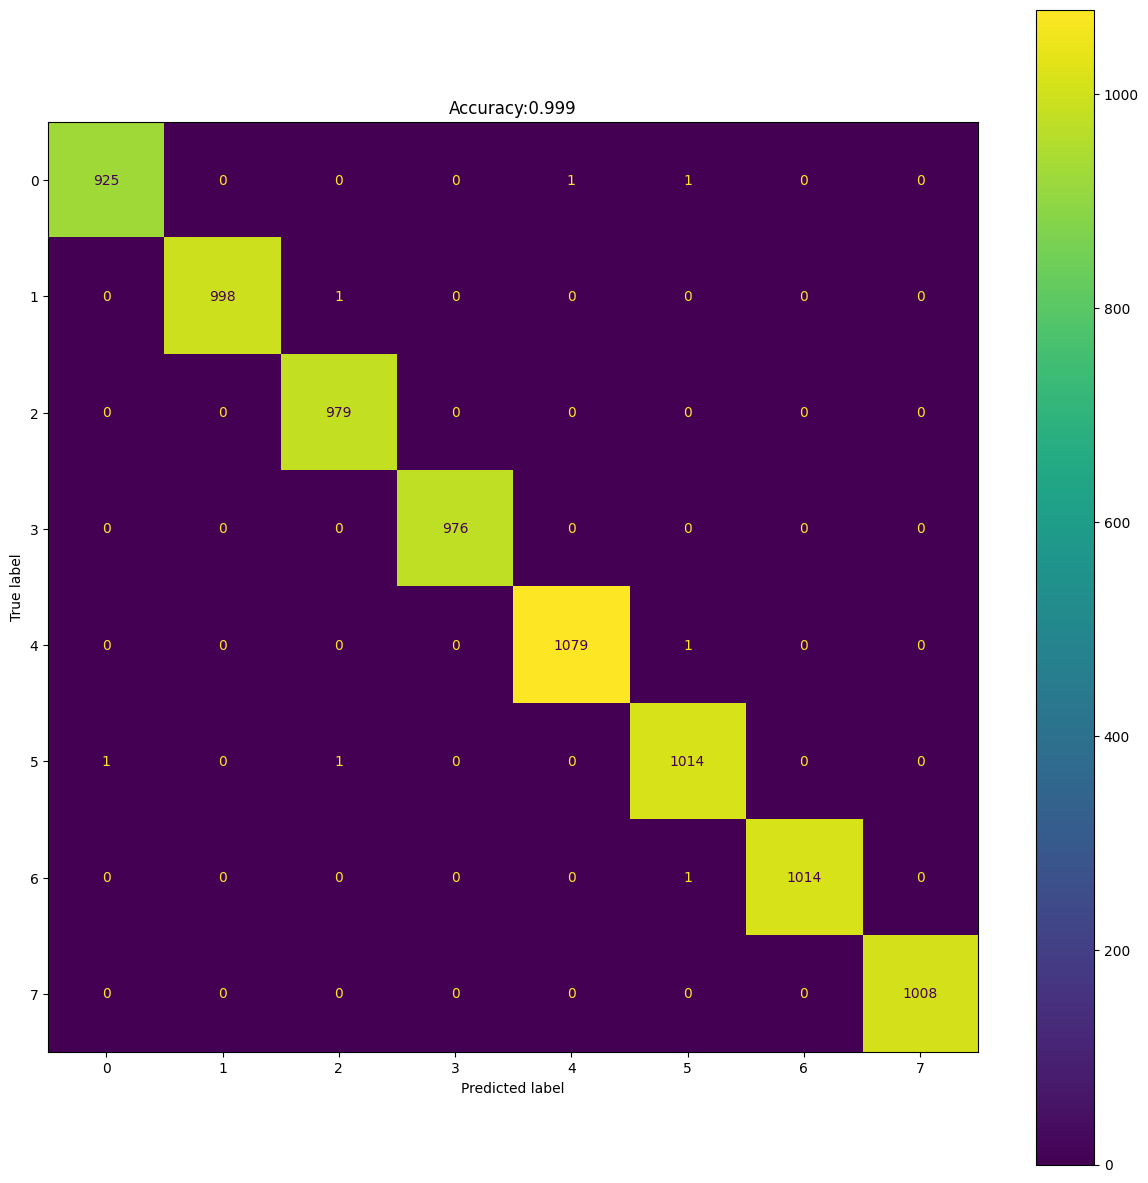

In [24]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-25/Nordic-device-25-Own_models/iNordic-25(iv)_confusion_matrix.pdf')

## Nordic Device-25(v) dataset

In [27]:
class_label = 8
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Nordic/32MHz/Device-25(v)/"

    if(i==0):
        data = getData(folder_path + "BLINK_new.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "blinky_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "blinky_rtc_freertos.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "blinky_systick.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "blinky.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "IDLE_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "led_softblink.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "Matrix_MUL_new.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[-0.015625 -0.0546875j  0.       +0.0390625j  0.03125  -0.1171875j ...
 -0.0078125+0.03125j    0.0546875-0.0234375j  0.0546875-0.078125j ]
2048
93040
(2048, 93040)
[0.02503357 0.01491655 0.00578485 ... 0.00497458 0.00474863 0.01464237]
0
(10000, 2048)
(10000,)
[ 0.015625 -0.0234375j  0.0546875-0.0078125j -0.015625 -0.0234375j ...
  0.0546875+0.03125j    0.09375  -0.046875j   0.0546875+0.078125j ]
2048
87043
(2048, 87043)
[0.02526503 0.01516426 0.00564226 ... 0.00574531 0.00514731 0.01459226]
1
(20000, 2048)
(20000,)
[-0.0390625+0.0078125j -0.0234375+0.0703125j  0.0859375-0.046875j  ...
  0.046875 -0.015625j   0.0390625-0.015625j  -0.078125 +0.03125j  ]
2048
86603
(2048, 86603)
[0.0257653  0.01548399 0.0051004  ... 0.00480043 0.00490231 0.01504519]
2
(30000, 2048)
(30000,)
[-0.0390625+0.046875j   0.0078125+0.046875j   0.046875 -0.046875j  ...
  0.046875 -0.1640625j -0.015625 +0.109375j  -0.015625 +0.0546875j]
2048
81556
(2048, 81556)
[0.02530597 0.0146407  0.00445778 ... 0.00496841 0.00

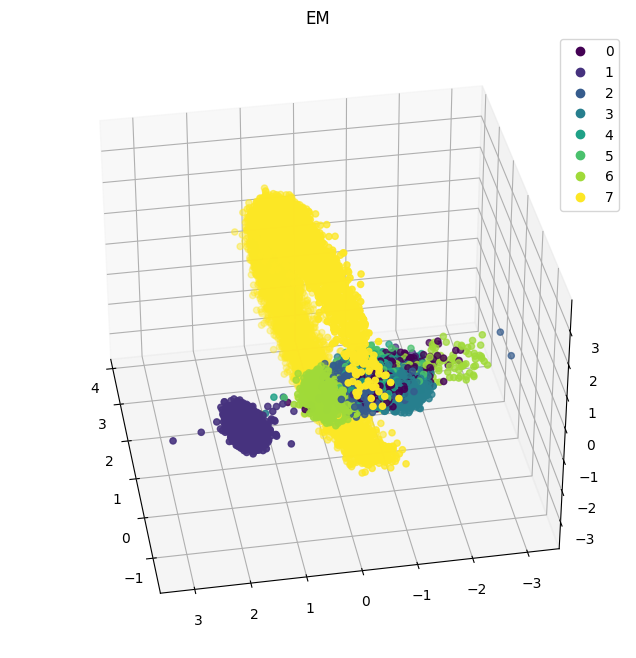

In [28]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-25/Nordic-device-25-Own_models/Nordic-25(v)_scatter.pdf')

In [29]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 8)                 808       
                                                                 
Total params: 4,511,008
Trainable params: 4,511,008
No

In [31]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-25/Nordic-device-25-Own_models/Nordic-25(v)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2025/2025 [==============================] - 23s 11ms/step - loss: 1.8879 - accuracy: 0.4629 - val_loss: 1.5113 - val_accuracy: 0.7365
Epoch 2/30
2025/2025 [==============================] - 21s 10ms/step - loss: 0.9881 - accuracy: 0.8254 - val_loss: 0.6038 - val_accuracy: 0.9097
Epoch 3/30
2025/2025 [==============================] - 21s 10ms/step - loss: 0.4104 - accuracy: 0.9285 - val_loss: 0.2784 - val_accuracy: 0.9500
Epoch 4/30
2025/2025 [==============================] - 30s 15ms/step - loss: 0.2017 - accuracy: 0.9628 - val_loss: 0.1496 - val_accuracy: 0.9744
Epoch 5/30
2025/2025 [==============================] - 23s 11ms/step - loss: 0.1164 - accuracy: 0.9789 - val_loss: 0.0968 - val_accuracy: 0.9847
Epoch 6/30
2025/2025 [==============================] - 22s 11ms/step - loss: 0.0760 - accuracy: 0.9872 - val_loss: 0.0676 - val_accuracy: 0.9885
Epoch 7/30
2025/2025 [==============================] - 20s 10ms/step - loss: 0.0544 - accuracy: 0.9906 - val_loss: 0.0519 -

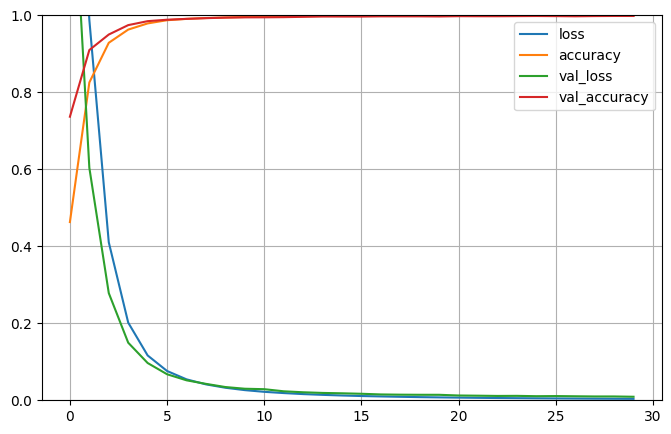

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/accuracy_and_loss_iPhone14Pro_I.pdf')

In [33]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-25/Nordic-device-25-Own_models/Nordic-25(v)_model.h5")

In [34]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

250/250 [==============================] - 1s 4ms/step - loss: 0.0066 - accuracy: 0.9985
test loss, test acc: [0.006624169647693634, 0.9984999895095825]


In [35]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

250/250 [==============================] - 1s 4ms/step
[0 0 3 ... 6 4 6]
0
[[ 926    0    1    0    0    0    0    0]
 [   0  996    1    0    0    2    0    0]
 [   0    0  978    1    0    0    0    0]
 [   0    0    1  974    0    0    0    1]
 [   3    0    0    0 1077    0    0    0]
 [   0    0    0    0    0 1016    0    0]
 [   0    0    0    0    0    2 1013    0]
 [   0    0    0    0    0    0    0 1008]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00       999
           2       1.00      1.00      1.00       979
           3       1.00      1.00      1.00       976
           4       1.00      1.00      1.00      1080
           5       1.00      1.00      1.00      1016
           6       1.00      1.00      1.00      1015
           7       1.00      1.00      1.00      1008

    accuracy                           1.00      8000
   macro avg       1.00      1.00     

Test Accuracy:0.9985


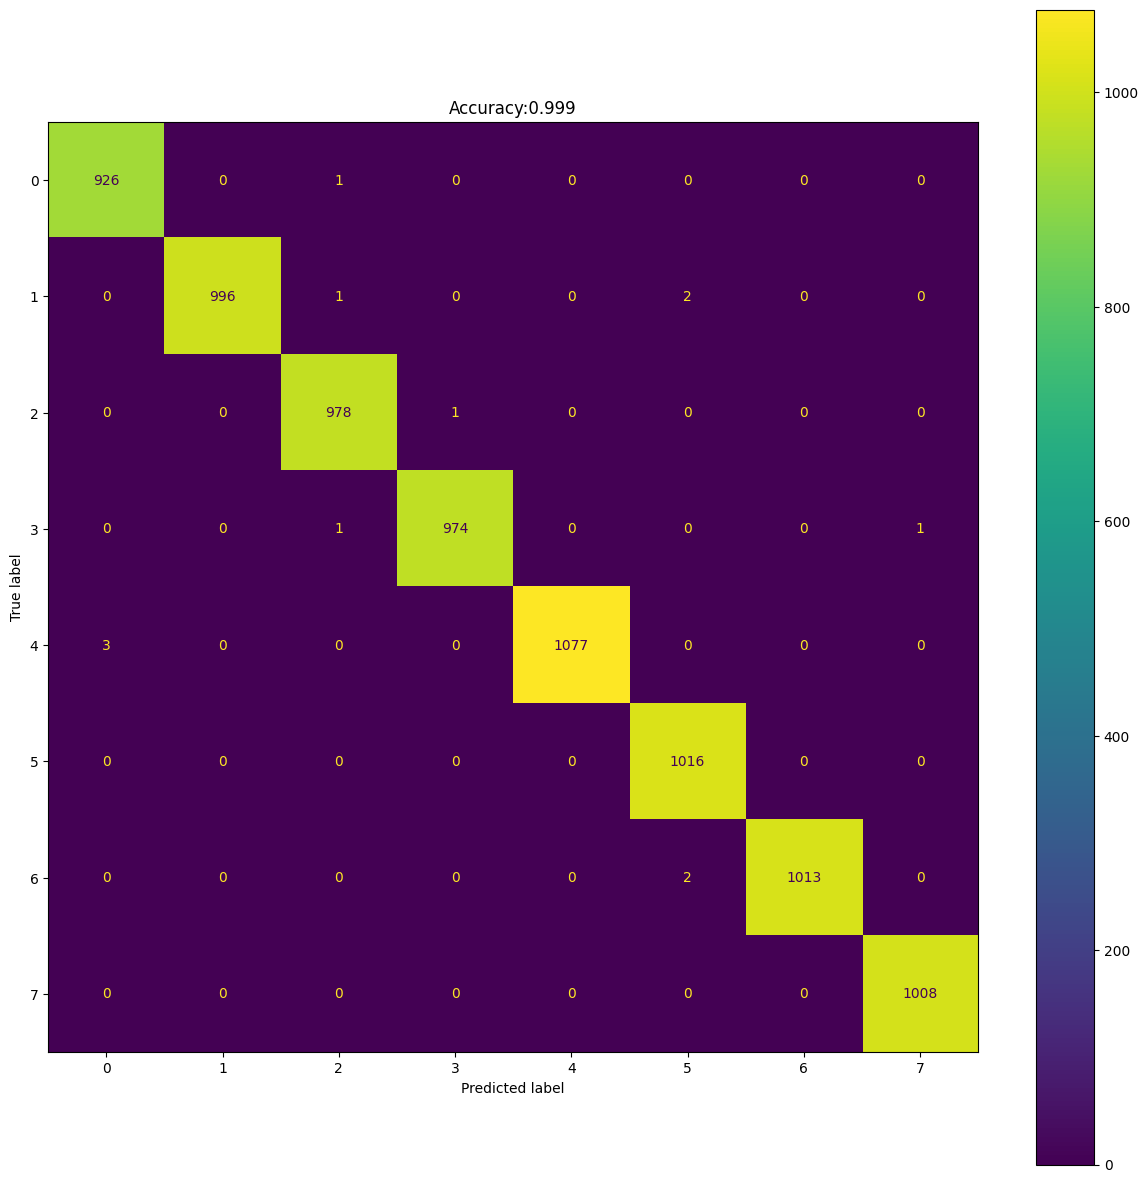

In [36]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Nordic/32MHz/Device-25/Nordic-device-25-Own_models/iNordic-25(v)_confusion_matrix.pdf')